# Function representations

Functions $f(x)$ can be projected onto a scaling basis $\{\phi_{i,l}^n\}$ by using a 
scaling projector $P^n_k$. 

\begin{align}
    f^n(x) = P^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k s_{j, l}^{n,f} \phi_{j,l}^n(x) 
\end{align}
where the scaling coefficients can be obtained by the projection integral
\begin{align}
    s^{n,f}_{j, l} = \int f(x) \phi_{i,l}^n(x) \text{ d}x
\end{align}
Next we'll make the projector $P^n_k$ then project the function, $f$
\begin{align}
    f(x) = 
    \begin{cases}
        e^{-a(x - b)} && x \geq b \\ 
        e^{a(x - b)} && x < b 
    \end{cases}
\end{align}

onto a scaling basis at different scales.

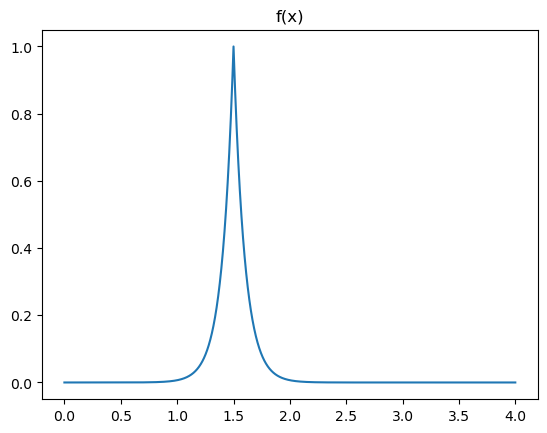

Then we'll plot the various function representaions $f^n$ together with the basis they are projected onto. 

In [1]:
from vampyr import vampyr1d as vp1
from vampyr import plotter
from numpy import exp, arange

import matplotlib.pyplot as plt
import numpy as np
# vampyr assumes the argument is a vector
def f(x):
    a = 10.0 # Increase a to make the function sharper
    b = 1.5 # Modify b to shift the function
    if x[0] >= b:
        return exp(-a*(x[0] -b))
    return exp(a*(x[0] - b))

# Make the MRA
# Note: This can be done in 1 step, but in this case we need a bit more control.
b_box = vp1.BoundingBox(scale=0, corner=[0], nboxes=[1], scaling=[4.0])
mra = vp1.MultiResolutionAnalysis(box=b_box, order=3)

# Make the scaling projectors P^n_k
P0 = vp1.ScalingProjector(mra, 0) # P^0_k
P1 = vp1.ScalingProjector(mra, 1) # P^1_k
P2 = vp1.ScalingProjector(mra, 2) # P^2_k
P3 = vp1.ScalingProjector(mra, 3) # P^3_k
P4 = vp1.ScalingProjector(mra, 4) # P^4_k
P5 = vp1.ScalingProjector(mra, 5) # P^4_k
P6 = vp1.ScalingProjector(mra, 6) # P^4_k

# Project f onto the basis
f0 = P0(f) #f^0 = P^0_k[f]
f1 = P1(f) #f^1 = P^1_k[f]
f2 = P2(f) #f^2 = P^2_k[f]
f3 = P3(f) #f^3 = P^3_k[f]
f4 = P4(f) #f^4 = P^4_k[f]
f5 = P5(f) #f^5 = P^5_k[f]
f6 = P6(f) #f^6 = P^6_k[f]

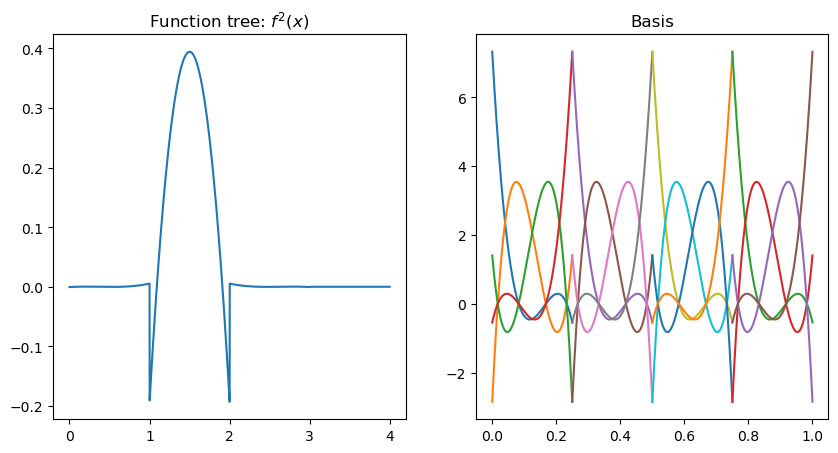

In [2]:
plotter.representation_vs_basis(f2, type = "scaling") # Vary between f0 and f4 and see how the function and corresponding basis changes
plt.show()

## Wavelet projection

Functions $f(x)$ can also be projected onto the corresponding wavelet basis $\{\psi_{i,l}^n\}$ by using a 
wavelet projector $Q^n_k$. 

\begin{align*}
    df^n(x) = Q^n_k [f(x)] = \sum_{l=0}^{2^n-1} \sum_{j=0}^k w_{j, l}^{n,f} \psi_{j,l}^n(x) 
\end{align*}
where the scaling coefficients can be obtained by the projection integral
\begin{align*}
    w^{n,f}_{j, l} = \int f(x) \psi_{i,l}^n(x) \text{ d}x
\end{align*}
where we write the function projection onto the wavelet basis as $df^n$. We'll explain why farther down.

Next, we use vampyr to project $f$ onto the wavelet basis, then as we did for the projection onto the 
scaling basis, we plot the $df^n$ next to it's corresponding basis. We'll also print the square norm
of the representation.


In [3]:
# Make the wavelet projectors Q^n_k
Q0 = vp1.WaveletProjector(mra, 0) # P^0_k
Q1 = vp1.WaveletProjector(mra, 1) # P^1_k
Q2 = vp1.WaveletProjector(mra, 2) # P^2_k
Q3 = vp1.WaveletProjector(mra, 3) # P^3_k
Q4 = vp1.WaveletProjector(mra, 4) # P^4_k
Q5 = vp1.WaveletProjector(mra, 5) # P^4_k

# Project f onto the basis
df0 = Q0(f) #f^0 = P^0_k[f]
df1 = Q1(f) #f^1 = P^1_k[f]
df2 = Q2(f) #f^2 = P^2_k[f]
df3 = Q3(f) #f^3 = P^3_k[f]
df4 = Q4(f) #f^4 = P^4_k[f]
df5 = Q5(f) #f^4 = P^4_k[f]

# This does not behave as expected
# print("Square norm df0", df0.norm())
# print("Square norm df1", df1.norm())
# print("Square norm df2", df2.norm())
# print("Square norm df3", df3.norm())
# print("Square norm df4", df4.norm())
# print("Square norm df5", df5.norm())

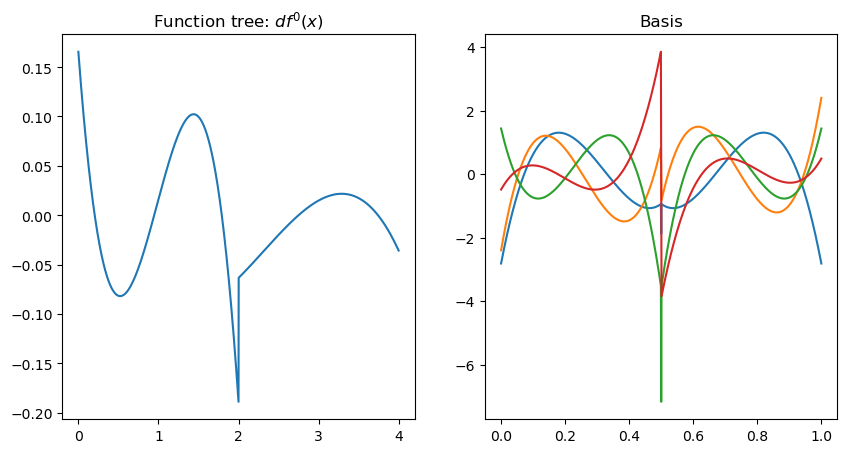

In [4]:
plotter.representation_vs_basis(df0, "wavelet") 
# Vary between df0 and df5 and see how the
# function and corresponding basis changes                                                
plt.show()

When we projected the function onto the scaling basis. Then the function representation
improved when we increased the scale. However, when we increase the scale of the wavelet
representation we see that the magnitude of the function representation decreases. That's
because the wavelet basis is constructed such that $df^n$ represent the difference 
between the $f$ projected onto the scaling basis at scale $n+1$ and $n$, i.e.,
\begin{align}
    df^n(x) = f^{n+1}(x) - f^n(x)
\end{align}

As an example let's plot both $df^n$ and $f^{n+1} - f^{n}$ and see how simular they are.
Note they look beter the higher scale we use, this has to do with the fact that the scaling
and wavelet factors are approximated numerically. The difference beween the figures are larger
for lower scales. 

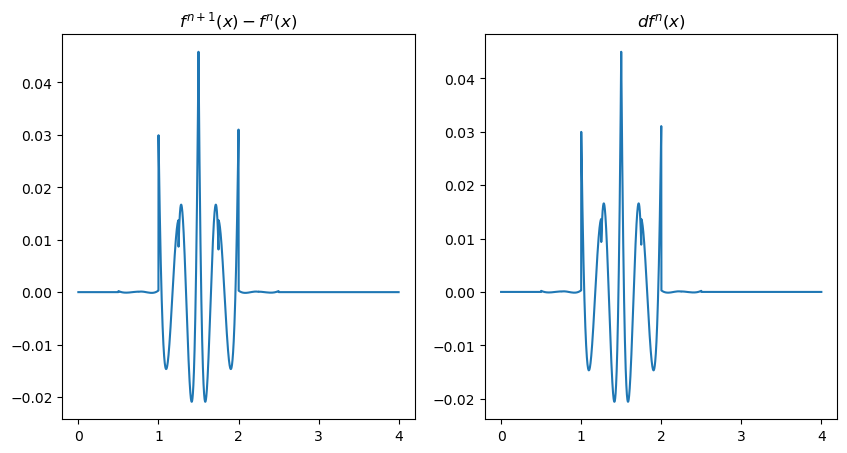

In [5]:
x = np.arange(0.0, 4.0, 0.001)
fnp1_fn_plot = [(f4-f3)([_]) for _ in x]
df_plot = [df3([_]) for _ in x]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x, fnp1_fn_plot)
ax[0].title.set_text("$f^{n+1}(x) - f^n(x)$")
ax[1].plot(x, df_plot)
ax[1].title.set_text("$df^{n}(x)$")
plt.show()

This means $f^n$ can be written in, what we call a multiresolution (or multiwavelet) representation, as 
\begin{align*}
    f^n(x) = f^0(x) + \sum_{n'=0}^n df^{n'}(x)
\end{align*}
This implies that we can start with projecting the function onto the cheapest zeroth scale, scaling basis, then
improve the function representation one scale at a time. 

If we look at the first figure where we compared the function representation with its basis. 
There if we plot the function projection onto the scaling basis with polynomial order $k=3$. We see that the cusp
of the slater function takes a while to converge but farther away from the cusp it looks converged at scale
$n=2$. From an eyeballing perspective this means at scale $n=4$, we use enough basis functions to represent the 
cusp accurately but we use way to many basis functions to represent the other edges, which were fine at scale
$n=2$. Meaning, wasted work to represent the entire function. This is when multiwavelets start to shine.

Keeping in mind that we work on computers with a finite precision available. With multiwavelets we can
project functions onto the multiwavelet basis, with a specified precision $\epsilon$ du to the relation
\begin{align*}
    ||w_l^n|| < 2^{-n/2} \epsilon ||f|| 
\end{align*}

In [6]:
epsilon = 1.0e-2
P_eps = vp1.ScalingProjector(mra, epsilon)

f_eps = P_eps(f)

[]

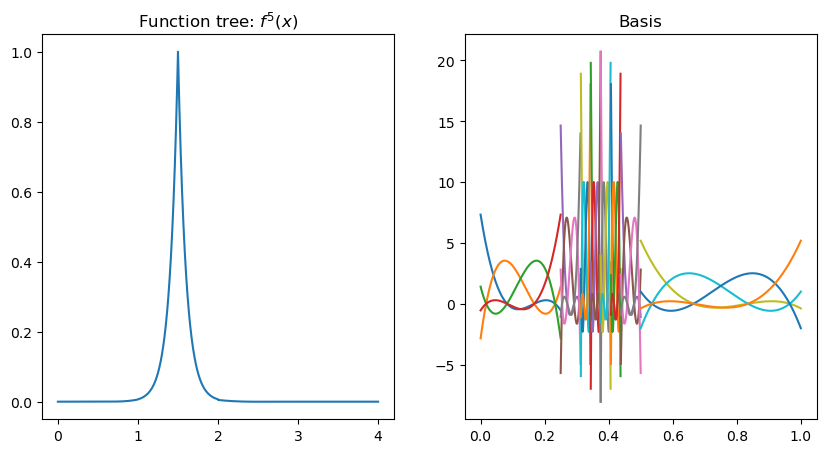

In [7]:
plotter.representation_vs_basis(f_eps)
plt.plot()

We see that to represent the cusp to a relative precision of 
$\epsilon = 1.0e-2$.
we need to go down to a scale $n=5$. But as the basis plot shows us is that we reach a relative
precision of $\epsilon = 1.0e-2$ a lot earler.